In [110]:
from helpers import process_data

data_list = process_data("trajectory_example.pickle")


for entry in data_list:
    print(entry)

(0.0, 0, 0.0, 0.0)
(0.25, 0.0, 0.0, 19.6)
(0.5, 1.225, 0.0, 19.6)
(0.75, 3.6750000000000003, 0.0, 19.6)
(1.0, 7.3500000000000005, 0.0, 19.6)
(1.25, 12.25, 0.0, 0.0)
(1.5, 17.15, -2.8290163190291664, 0.0)
(1.75, 22.049999999999997, -2.8290163190291664, 0.0)
(2.0, 26.949999999999996, -2.8290163190291664, 0.0)
(2.25, 31.849999999999994, -2.8290163190291664, 0.0)
(2.5, 36.74999999999999, -2.8290163190291664, 0.0)
(2.75, 41.64999999999999, -2.8290163190291664, 0.0)
(3.0, 46.54999999999999, -2.8290163190291664, 0.0)
(3.25, 51.44999999999999, -2.8290163190291664, 0.0)
(3.5, 56.34999999999999, -2.8290163190291664, 0.0)


In [111]:
from math import cos,sin, pi
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Define column indices in data array data_list
timestamp_index = 0
displacement_index = 1
yaw_rate_index = 2
acceleration_index = 3

# convert the timestamp and displacement into speed 
def get_speed(data_list):
    speed = 0.0
    
    speeds = [speed]
    for index in range(1,len(data_list)):
        last_row = data_list[index - 1]
        row = data_list[index]
        
        time = row[timestamp_index] - last_row[timestamp_index]
        acceleration = row[acceleration_index]
        speed += time*acceleration
        speeds.append(speed)
    return speeds

# get headings by multiplied yaw_rate by time_delta
def get_headings(data_list):
    heading = 0.0
    headings = [heading]
    
    for index in range(1,len(data_list)):
        last_row = data_list[index - 1]
        row = data_list[index]
        
        time = row[timestamp_index] - last_row[timestamp_index]
        diff = row[yaw_rate_index]
        heading += time*diff
        headings.append(heading)
    return headings

# This function will get vehicle's coordinates
def get_x_y(data_list):
    headings = get_headings(data_list)
    
    x = 0
    y = 0
    
    positions = [(x,y)]
    
    for index in range(1,len(data_list)):
        
        positions.append((x,y))
        
        last_row = data_list[index - 1]
        row = data_list[index]
        
        time = row[timestamp_index] - last_row[timestamp_index]
        move_diff = row[displacement_index] - last_row[displacement_index]
        heading = headings[index]
        
        x += cos(heading)*move_diff
        y += sin(heading)*move_diff
    return positions
    

# show the vehicle's pistion and movement direction at all time stamps

def show_x_y(data_list):
    
    positions = get_x_y(data_list)
    headings = get_headings(data_list)
    
    X = [row[0] for row in positions]
    Y = [row[1] for row in positions]
    U = [cos(heading) for heading in headings]
    V = [sin(heading) for heading in headings]
    
    plt.figure()
    plt.title('Trajectory visualization')
    plt.axes().set_aspect('equal')
    Q = plt.quiver(X, Y, U, V, units = 'width')
    qk = plt.quiverkey(Q,0.9,0.9,2,r'$2 \frac{m}{s}$', labelpos = 'E', coordinates = 'figure')
    plt.show()
    
    return 
    

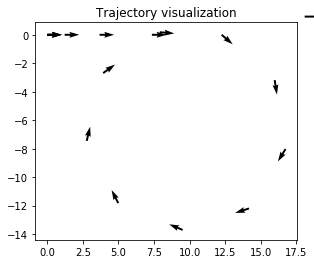

In [112]:
show_x_y(data_list)